# Pt1 What is an API

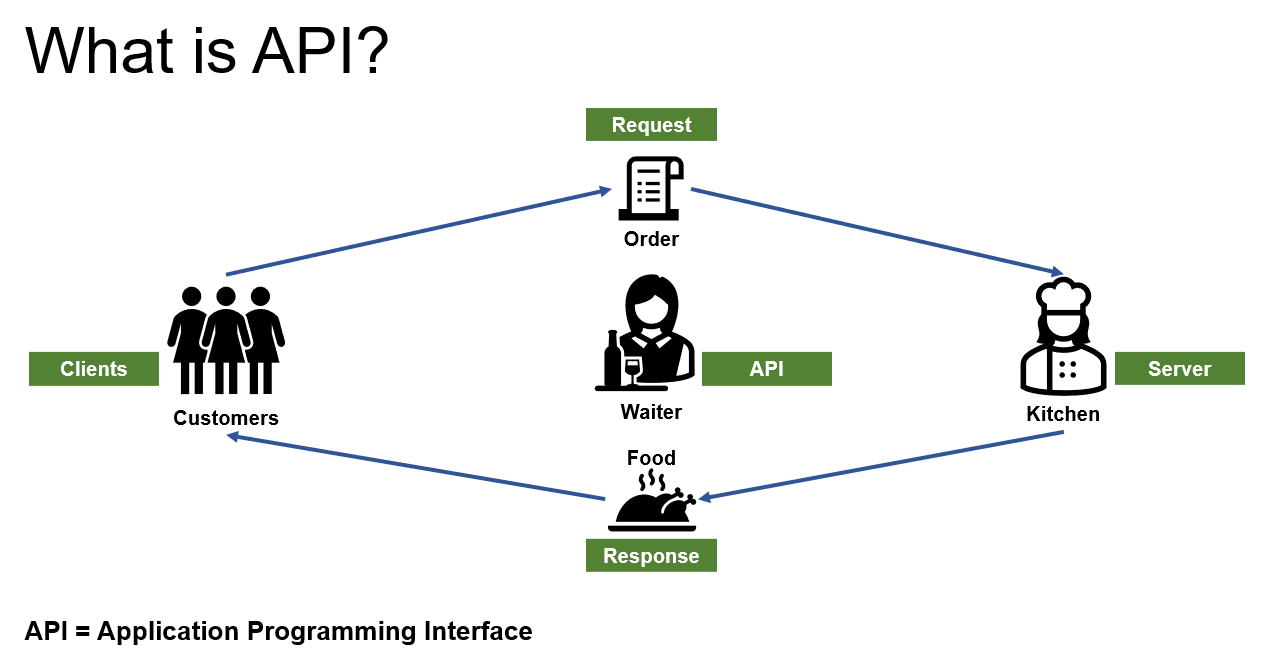

* What does an API Request look like?
* Looks like a URL... will that work if I put it in a browser? (yes)

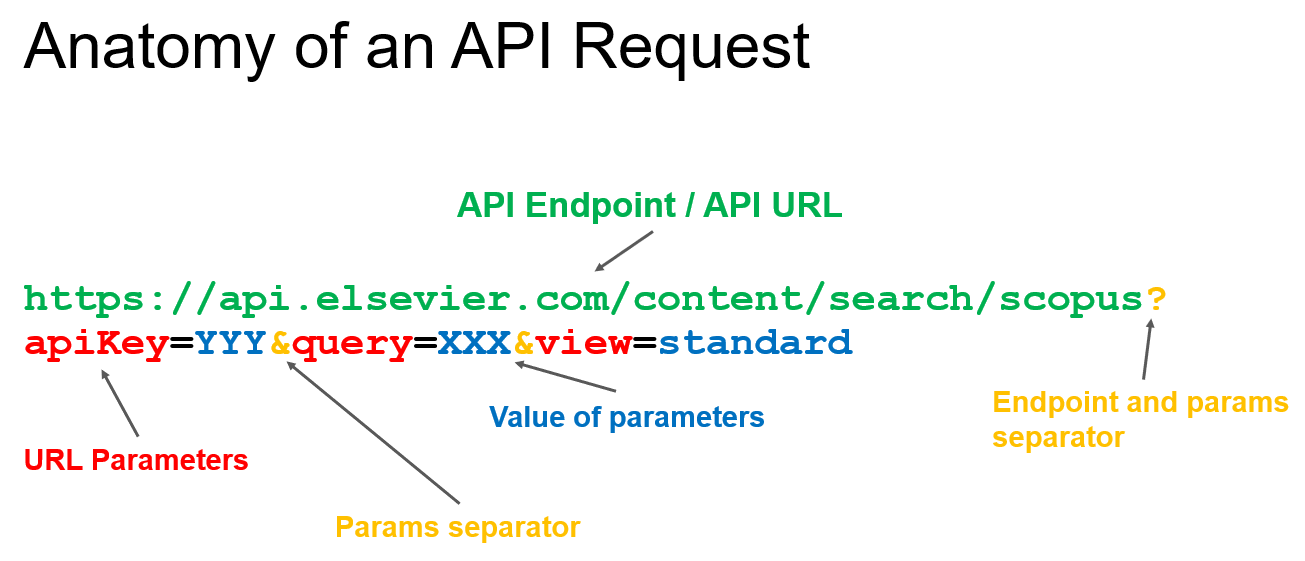

# Pt2 Making API request with Scopus API

In [ ]:
import requests as rq # we need this library in order to make send the API request

## The "beginner" way

In [ ]:
api_call = "https://api.elsevier.com/content/search/scopus?apiKey=YOURAPIKEYHERE&query=(title(relationship management) AND SUBJAREA(BUSI))&httpAccept=application/json"

In [ ]:
# call the API take a peek on the response in JSON format
scopus_response = rq.get(api_call)

In [ ]:
# examine result
print(scopus_response.status_code) # print the status code. the code that we're looking for is 200
print(scopus_response.text) # the response is stored here

In [ ]:
type(scopus_response.text) # turns out this is a string! 

In [ ]:
# Tell python to "format" this string of text as JSON. 
response_json = scopus_response.json()

# Python will then save the info into what we call dictionary

In [ ]:
type(response_json) # this should be a dictionary

## The "slightly better" way

URL Encoding (Percent Encoding)

* URL encoding converts characters into a format that can be transmitted over the Internet.
* URLs cannot contain spaces. URL encoding normally replaces a space with a plus (+) sign or with %20.
* example of non-encoded URL: "https://www.google.com/search?q=hello world?" --> invalid URL
* example of encoded URL: "https://www.google.com/search?q=hello+world%3F " --> all the spaces are encoded into ascii character

In [ ]:
# to parse the URL, we can use the following library:
import urllib.parse as urlparser

* The function that we need, `urlencode`, accepts `dictionary` datatype. Right now, ours is a `string` so we'll have to convert that.
* the part that needs to be encoded are the parameters. Let's put them all into a `dictionary`.
* `dictionary` is similar to `list`, except that it has "key" label and a "value" attached to it. 
* `dictionary` is enclosed in `{}`, while `list` is enclosed in `[]`

In [ ]:
# create a dictionary
params = {'apiKey': 'YOURAPIKEYHERE'
          , 'query': '(title(relationship management) AND SUBJAREA(BUSI))'
          , 'httpAccept': "application/json"} 

#encode the parameters
api_call = "https://api.elsevier.com/content/search/scopus?" + urlparser.urlencode(params) 

In [ ]:
print(api_call) # now the API request should look like a valid URl!

In [ ]:
scopus_search_response = rq.get(api_call)

## The "sneaky" way (using Http Headers)

In [ ]:
# similar to the above, let's put all the header parameters into dictionary
header = {"Accept": "application/json"
         , "X-ELS-APIKey": "YOURAPIKEYHERE"}

# since some of the parameters are moved to header, we can take this out of the params dictionary
params = {'query': '(title(relationship management) AND SUBJAREA(BUSI))'} 
api_call = "https://api.elsevier.com/content/search/scopus?" + urlparser.urlencode(params)

In [ ]:
print(api_call) # the API request should look much shorter now. 

In [ ]:
# now when we make the API request, add in the header info.
scopus_response = rq.get(api_call, headers = header)

# Pt 3 What to do with the returned data? (important!)

* The very next thing to do once you ensure that your API call is successful is to save it into a file.
* Why? because:
  * Enable you to do your calculations offline
  * Some APIs may limit the number of calls you can make in a day
  * Some API may take a while to process your call

In [ ]:
# conver the response to dictionary first
# dump the content into a file
f = open("scopus_data.json", "w")
f.write(json.dumps(response_json, indent=4))
f.close()

* after saving into a file, now you can just read from the file instead of making API calls

In [ ]:
# read the content of the json file, save to file_data
f = open('scopus_data.json')
file_data = json.load(f)
f.close()

In [ ]:
type(file_data) # this should be dictionary
file_data

* we are only interested in the things inside the "entry" branch, so let's get just that.

In [ ]:
# entry branch is inside the search-results branch
scopus_data = file_data.get("search-results").get("entry")

In [ ]:
import pandas as pd

In [ ]:
# load the content to a dataframe. Now it's ready for further analysis!
df = pd.DataFrame(scopus_data)
df